In [3]:
import numpy as np

def gradient_descent(x,y):
    m_curr=b_curr=0
    iterations=10000
    learning_rate=0.001
    n=len(x)

    for i in range(iterations):
      y_predicted=m_curr*x+b_curr
      cost=(1/n)*sum([val**2 for val in (y-y_predicted)])

      md=-(2/n)*sum(x*(y-y_predicted))
      bd=-(2/n)*sum(y-y_predicted)
      m_curr=m_curr-learning_rate*md
      b_curr=b_curr-learning_rate*bd

    return m_curr,b_curr



x=np.array([1,2,3,4,5])
y=np.array([5,7,9,11,13])

gradient_descent(x,y)


(2.021391068947519, 2.9227714537500327)

In [4]:
import pandas as pd
import math
import sklearn.linear_model as linear_model
df=pd.read_csv('test_scores.csv')
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [5]:
def grad_desc(x,y):
  m_curr=b_curr=0
  rate=0.0002
  n=len(x)
  prevcost=0
  while True:
    y_predicted = m_curr*x + b_curr
    cost=(1/n)*sum([val**2 for val in (y-y_predicted)])
    if math.isclose(cost,prevcost,rel_tol=1e-20):
      return m_curr,b_curr

    prevcost=cost
    md=-(2/n)*sum(x*(y-y_predicted))
    bd=-(2/n)*sum(y-y_predicted)

    m_curr=m_curr-rate*md
    b_curr=b_curr-rate*bd

def linear_reg(x,y):
  df=pd.read_csv('test_scores.csv')
  reg=linear_model.LinearRegression()
  reg.fit(df[['math']],df['cs'])
  return reg.coef_,reg.intercept_


x=np.array(df.math)
y=np.array(df.cs)

print(grad_desc(x,y))
print(linear_reg(x,y))



(1.0177381667793246, 1.9150826134339467)
(array([1.01773624]), 1.9152193111569034)


one hot encoding

In [6]:
import pandas as pd
df=pd.read_csv('homeprices_one_hot_encoding.csv')
df


,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [7]:
# exercise one hot encoder
import pandas as pd
import sklearn.linear_model as linear_model
import matplotlib.pyplot as plt

df=pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


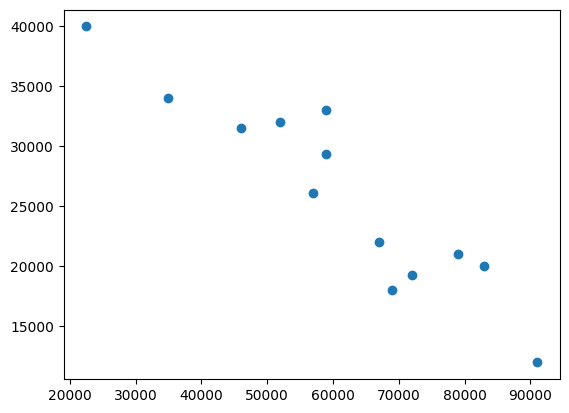

In [8]:
plt.scatter(df.Mileage,df['Sell Price($)'])
plt.show()

In [9]:
ldf_dummie=pd.get_dummies(df['Car Model'])
ldf_dummie

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [10]:
ndf=pd.concat([df,ldf_dummie],axis='columns')
ndf

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [11]:
ndf=ndf.drop(['Car Model','Audi A5'],axis='columns')
ndf

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,True,False
1,35000,34000,3,True,False
2,57000,26100,5,True,False
3,22500,40000,2,True,False
4,46000,31500,4,True,False
5,59000,29400,5,False,False
6,52000,32000,5,False,False
7,72000,19300,6,False,False
8,91000,12000,8,False,False
9,67000,22000,6,False,True


In [12]:
regmodel=linear_model.LinearRegression()
regmodel.fit(ndf[['Mileage' ,	'Age(yrs)',	'BMW X5',	'Mercedez Benz C class']],ndf['Sell Price($)'])

LinearRegression()

In [13]:
regmodel.score(ndf[['Mileage' ,	'Age(yrs)',	'BMW X5',	'Mercedez Benz C class']],ndf['Sell Price($)'])

0.9417050937281083

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()



In [15]:
dfle=df['Car Model']
dfle=le.fit_transform(dfle)
dfle

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [16]:
#logistic regression
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


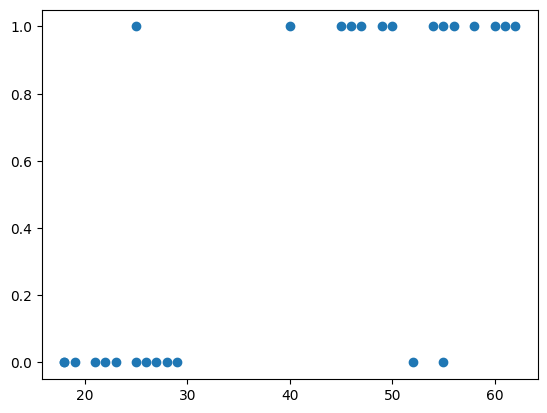

In [17]:
plt.scatter(df.age,df.bought_insurance)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.33)

In [19]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [20]:
log.score(X_test,y_test)

0.8888888888888888

# logistic regression assignment


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
left=df[df.left==1]
left.shape

(3571, 10)

In [23]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [24]:
df.groupby('left')[df.select_dtypes(include='number').columns].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


<Axes: xlabel='salary'>

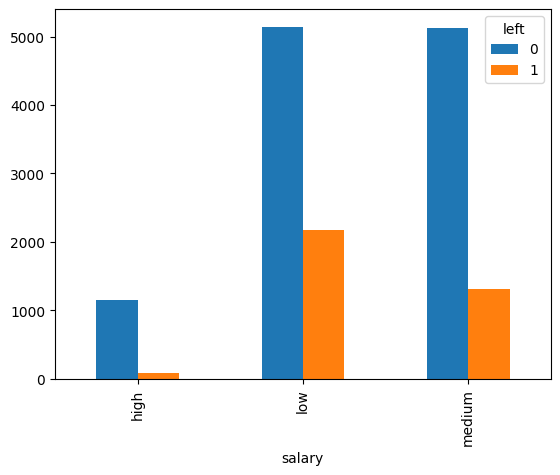

In [25]:
#salary vs retentions

pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

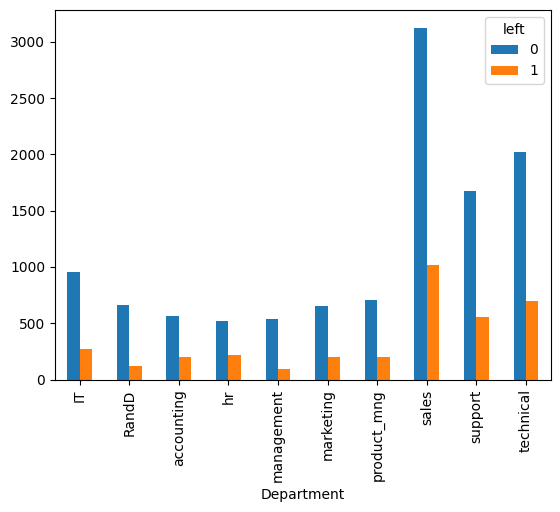

In [26]:
#departments vs retentions
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [27]:
#satisfaction, promotion 5 years, salary , working hours
subdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [28]:
s=pd.get_dummies(subdf.salary,prefix='salary')
newdf=pd.concat([subdf,s],axis='columns')
newdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [29]:
ndf=newdf.drop(columns='salary')

In [30]:
ndf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,False,True,False
14995,0.37,160,0,False,True,False
14996,0.37,143,0,False,True,False
14997,0.11,280,0,False,True,False


In [31]:
X=ndf
y=df.left

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
model=LogisticRegression()

In [33]:
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
model.score(X_test,y_test)

0.7820202020202021

# logistic multi class


In [35]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits=load_digits()

In [36]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [37]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

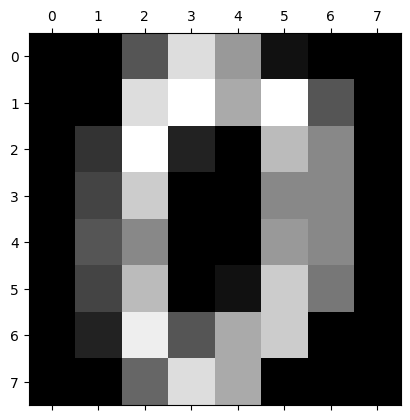

In [38]:
plt.gray()
plt.matshow(digits.images[0])

In [39]:
#exercise

In [40]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
flower=load_iris()

dir(flower)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

X_train,X_test,y_train,y_test=train_test_split(flower.data,flower.target,test_size=0.25)
X_train,X_test,y_train,y_test

(array([[5.1, 3.4, 1.5, 0.2],
        [5.8, 2.7, 4.1, 1. ],
        [6.6, 3. , 4.4, 1.4],
        [5. , 3.6, 1.4, 0.2],
        [5.8, 2.7, 5.1, 1.9],
        [5.6, 2.7, 4.2, 1.3],
        [5.8, 2.7, 3.9, 1.2],
        [5.7, 2.8, 4.1, 1.3],
        [6. , 2.7, 5.1, 1.6],
        [5.5, 3.5, 1.3, 0.2],
        [6.1, 3. , 4.9, 1.8],
        [6.3, 2.3, 4.4, 1.3],
        [7.7, 2.6, 6.9, 2.3],
        [5.4, 3.9, 1.7, 0.4],
        [4.7, 3.2, 1.6, 0.2],
        [5.1, 3.8, 1.9, 0.4],
        [6.4, 2.9, 4.3, 1.3],
        [6.3, 3.4, 5.6, 2.4],
        [7.4, 2.8, 6.1, 1.9],
        [6.7, 2.5, 5.8, 1.8],
        [5.7, 2.6, 3.5, 1. ],
        [6.3, 2.7, 4.9, 1.8],
        [6. , 2.9, 4.5, 1.5],
        [6. , 2.2, 5. , 1.5],
        [6.4, 2.8, 5.6, 2.2],
        [5.1, 3.7, 1.5, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [6.3, 2.5, 4.9, 1.5],
        [5.9, 3.2, 4.8, 1.8],
        [5.7, 2.5, 5. , 2. ],
        [4.9, 3.1, 1.5, 0.1],
        [7.2, 3.6, 6.1, 2.5],
        [5.1, 3.5, 1.4, 0.2],
        [5

In [42]:
reg.fit(X_train,y_train)

LogisticRegression()

In [43]:
reg.score(X_test,y_test)

0.9473684210526315

In [44]:
#decision tree
import pandas as pd
df=pd.read_csv('salaries.csv')
df.head()


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [45]:
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

In [46]:
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [47]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_company.fit_transform(inputs['job'])
inputs['degree_n']=le_company.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [48]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')

In [49]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(inputs_n,target)




DecisionTreeClassifier()

In [50]:
#exercise titanics decision trees
import pandas as pd
df=pd.read_csv('titanic.csv')
inputs=df[['Pclass','Sex','Age','Fare']]
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
target=df['Survived']

df.head()

<ipython-input-50-5f19a4a79bba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs.Age = inputs.Age.fillna(inputs.Age.mean())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

inputs['Pclass_n']=le.fit_transform(inputs['Pclass'])
inputs['Sex_n']=le.fit_transform(inputs['Sex'])
inputs['Age_n']=le.fit_transform(inputs['Age'])
inputs['Fare_n']=le.fit_transform(inputs['Fare'])

inputs_n=inputs.drop(['Pclass','Sex','Age','Fare'],axis='columns')


<ipython-input-51-4c19ff15698e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Pclass_n']=le.fit_transform(inputs['Pclass'])
<ipython-input-51-4c19ff15698e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Sex_n']=le.fit_transform(inputs['Sex'])
<ipython-input-51-4c19ff15698e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [52]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [53]:
inputdata=np.array([3, 1, 22, 100]).reshape(1, -1) # Provide 4 features for prediction
model.predict(inputdata)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])